This work is about an analysis of petrol formulations. A customer informed their consultant that they have developed several formulations that gives different characteristics of burning pattern. The formulations are obtaining by adding varying levels of additives that, for example, prevent engine knocking, gum prevention, stability in storage, and etc. Here, the consultant will be assisted on establishing descriptive statistics, data visualization and clustering of formulations.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('ingredient.csv')

ingredient dataset is used in this analysis, where ingredients of additives namely a to i are varied for each formulation. The formulations are obtaining by adding varying levels of additives that, for example, prevent engine knocking, gum prevention, stability in storage, and etc. In order to confirm the characteristics of each ingredient, statistical analysis carried out.

In [3]:
df

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00
...,...,...,...,...,...,...,...,...,...
209,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16
210,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32
211,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00
212,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.00,0.22


Here, 214 formulations were developed using said additives.

In [4]:
df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In this formulation, it is discovered that, amount of each additive added in average are 1.518365, 13.408, 2.684, 1.444, 72.651, 0.497, 8.957, 0.175 and 0.057 for a until i respectively. For the quantity added, additive c has largest standard deviation, while a has the lowest. Additive e take up the most quantity compare to others, where the quantity used up to 75.41.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [6]:
df.isnull().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
dtype: int64

Overall, the data types of this dataset are in float type, and there is no missing values detected.

In [7]:
col = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

for i in col:
    stat, p = stats.normaltest(df[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print(i,' looks Gaussian (fail to reject H0)')
    else:
        print(i,' does not look Gaussian (reject H0)')
        print(' ')

Statistics=84.358, p=0.000
a  does not look Gaussian (reject H0)
 
Statistics=27.015, p=0.000
b  does not look Gaussian (reject H0)
 
Statistics=35.885, p=0.000
c  does not look Gaussian (reject H0)
 
Statistics=36.773, p=0.000
d  does not look Gaussian (reject H0)
 
Statistics=35.873, p=0.000
e  does not look Gaussian (reject H0)
 
Statistics=305.666, p=0.000
f  does not look Gaussian (reject H0)
 
Statistics=109.473, p=0.000
g  does not look Gaussian (reject H0)
 
Statistics=177.280, p=0.000
h  does not look Gaussian (reject H0)
 
Statistics=76.867, p=0.000
i  does not look Gaussian (reject H0)
 


Normality test aka Shapiro Wilk test being used to identify whether each additive distribution is Gaussian or not. Based on the statistics test, null hypothesis is the distribution is Gaussian, while the alternative hypothesis is the distribution is not Gaussian. Thus, in this test, all of the additives not distributed in Gaussian manner.

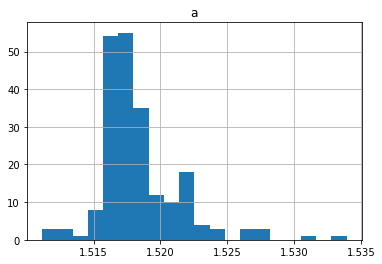

Kurtosis of normal distribution: 4.789354225457543
Skewness of normal distribution: 1.614015045661985


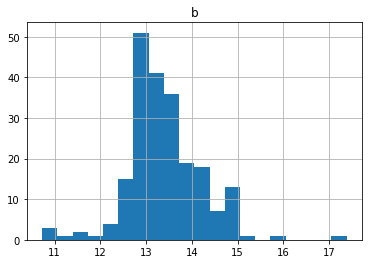

Kurtosis of normal distribution: 2.9534765835002235
Skewness of normal distribution: 0.45099172001161314


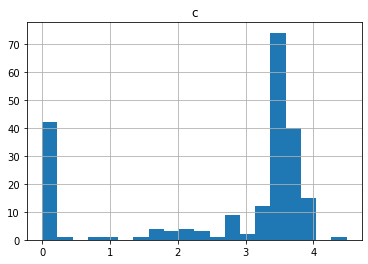

Kurtosis of normal distribution: -0.42870155798811416
Skewness of normal distribution: -1.1444648495986693


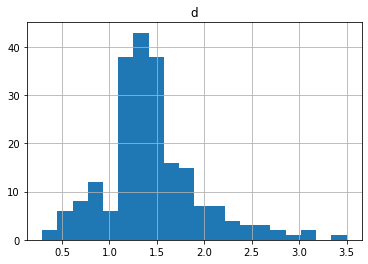

Kurtosis of normal distribution: 1.9848317746238235
Skewness of normal distribution: 0.9009178781425263


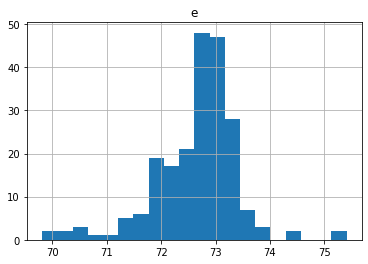

Kurtosis of normal distribution: 2.8711045971453544
Skewness of normal distribution: -0.7253172664513232


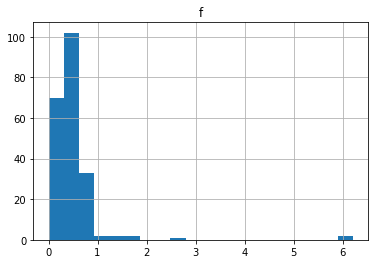

Kurtosis of normal distribution: 53.392326556204594
Skewness of normal distribution: 6.505635834012892


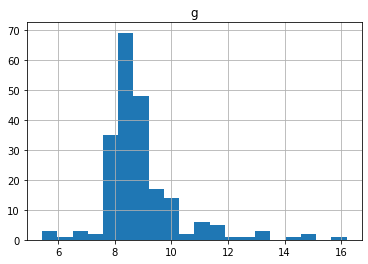

Kurtosis of normal distribution: 6.498967959876062
Skewness of normal distribution: 2.032677375526248


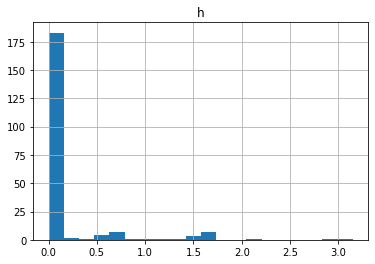

Kurtosis of normal distribution: 12.222071204852478
Skewness of normal distribution: 3.3924308894408464


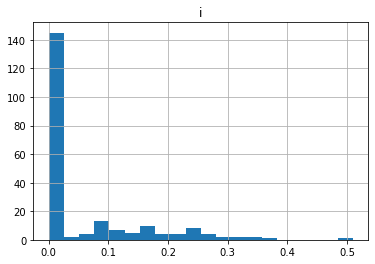

Kurtosis of normal distribution: 2.572317558672152
Skewness of normal distribution: 1.7420067617989543


In [8]:
col = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

for i in col:
    df[i].hist(bins=20)
    plt.title(i)
    plt.show()
    print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(df[i])))
    print( 'Skewness of normal distribution: {}'.format(stats.skew(df[i])))

Visualization using histogram being done to confirm the distribution pattern. Here, kurtosis and skewness also calculated. It is discovered that additive f is the most heavily skewed compare to the others.

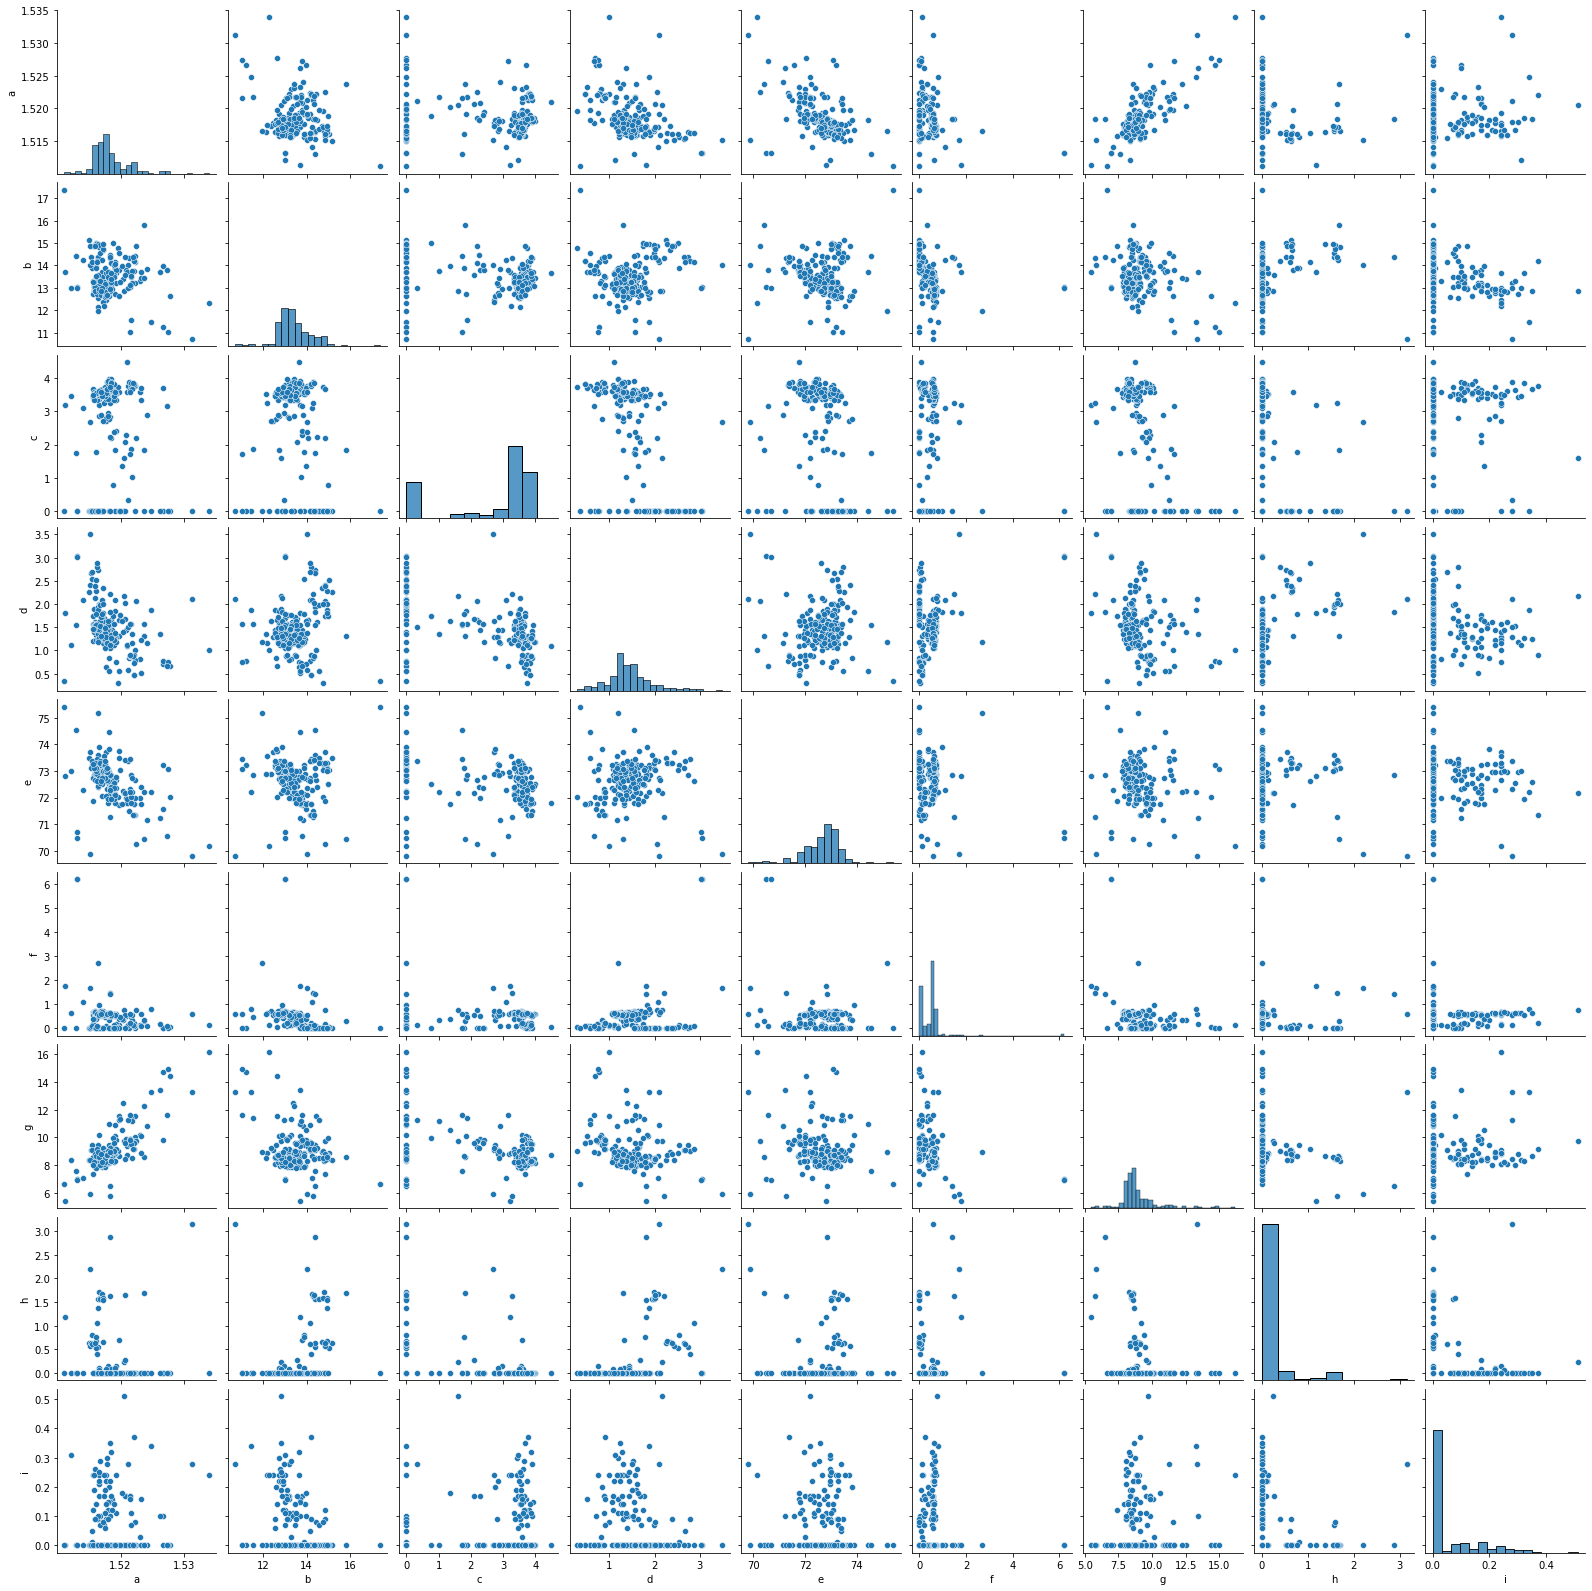

In [9]:
sns.pairplot(df)

<AxesSubplot:>

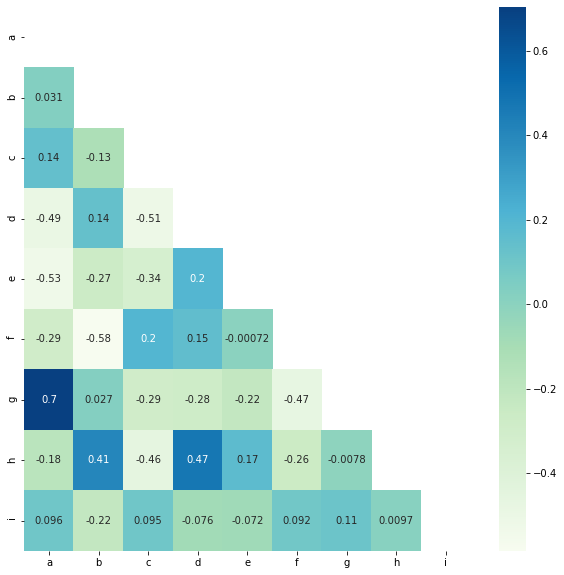

In [10]:
plt.figure(figsize=(10,10))
corr=df.corr(method='spearman')
matrix = np.triu(corr)
sns.heatmap(corr,cmap='GnBu',annot=True,mask=matrix)

Pairwise graph is plotted for the overall dataset. Here, the correlation between each additive visualized. It can be observed that, the correlations between additives are weak. Thus, it can be said that the additives are independent and no strong relationship detected. Meaning that, the increasing and decreasing of one additive does not influenced the amount of other corresponding additives.

Text(0, 0.5, 'Level')

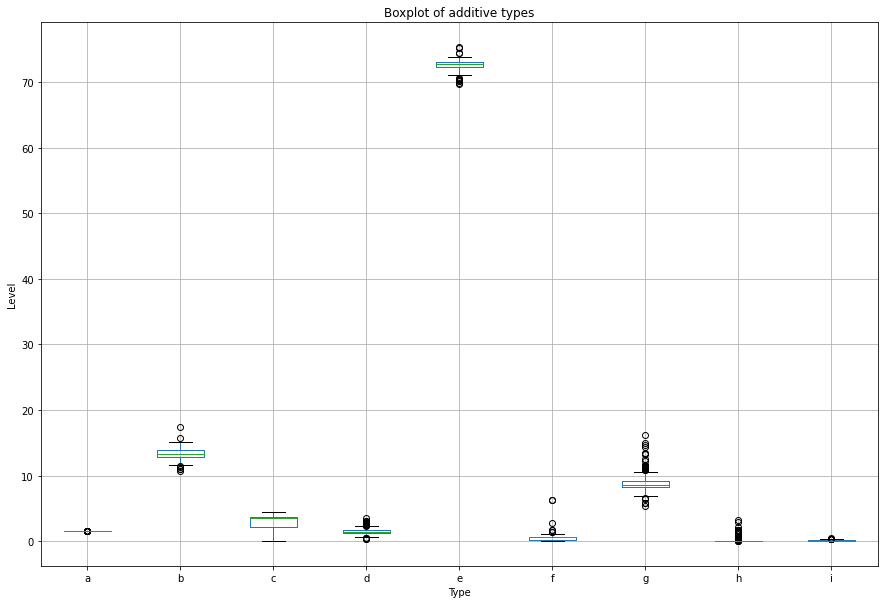

In [11]:
df.boxplot(figsize=(15,10))
plt.title('Boxplot of additive types')
plt.xlabel('Type')
plt.ylabel('Level')

Each additives assumed to be independent of each other. Also, all of them are non-Gaussian distributed. Meaning that, non-parametric test will be used. To test the distribution difference between two samples, Mann-Whitney U test is used. The hypothesis of this test as per shown below:

Fail to Reject H0: Sample distributions are equal.
Reject H0: Sample distributions are not equal.

In [12]:
stat, p = stats.mannwhitneyu(df['c'], df['d'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=10178.500, p=0.000
Different distribution (reject H0)


Since the p-value (0.00) is less than 0.05, we reject the null hypothesis. We have sufficient evidence to say that the true mean level used for the formulation is different between the two groups.

In [13]:
stat, p = stats.mannwhitneyu(df['d'], df['e'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=0.000, p=0.000
Different distribution (reject H0)


Since the p-value (0.00) is less than 0.05, we reject the null hypothesis. We have sufficient evidence to say that the true mean level used for the formulation is different between the two groups.

In [14]:
stat, p = stats.mannwhitneyu(df['d'], df['f'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=2233.000, p=0.000
Different distribution (reject H0)


Since the p-value (0.00) is less than 0.05, we reject the null hypothesis. We have sufficient evidence to say that the true mean level used for the formulation is different between the two groups.

In [15]:
stat, p = stats.mannwhitneyu(df['h'], df['i'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=20416.500, p=0.006
Different distribution (reject H0)


Since the p-value (0.00) is less than 0.05, we reject the null hypothesis. We have sufficient evidence to say that the true mean level used for the formulation is different between the two groups.

Kruskal-Wallis test is a non-parametric test and an alternative to One-Way Anova. By parametric we mean, the data is not assumed to become from a particular distribution. The main objective of this test is used to determine whether there is a statistical difference between the medians of at least three independent groups. 

The null hypothesis (H0): The median is the same for all the data groups.
The alternative hypothesis: (Ha): The median is not equal for all the data groups.

In [16]:
stat, p = stats.kruskal(df['a'],df['b'],df['c'],df['d'],
                       df['e'],df['f'],df['g'],df['h'],
                       df['i'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=1707.638, p=0.000
Different distribution (reject H0)


The test statistic comes out to be equal to 1707.638 and the corresponding p-value is 0.000. As the p-value is less than 0.05, we reject the null hypothesis that the median amount of additive use is the not same for all groups. Hence, We have sufficient proof to claim that the different types of additives used lead to statistically significant differences in the formulation.

In [17]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

Here, standard scaler is used to re-scale the levels of all chemicals. Frankly speaking, the scaling has no effect on the sum of the squared Euclidean distances. However, in order to reduce computational cost, for simplicity, it is preferred to re-scale the dataset.

In [18]:
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.875789e-14,2.196581e-15,-1.265862e-16,-3.382549e-16,9.753361e-16,3.320293e-17,-3.102399e-16,-1.063531e-16,-1.556387e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


In [19]:
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In this step, the cluster is initially defined as 2 clusters. The reason is to initialize the k-means calculation, for determinig the starting point of sum of squared Euclidean distance or inertia. Init use is k-means++ to speed up the calculation convergence.

In [20]:
kmeans.inertia_

1526.8137002823614

For 2 clusters, the inertia calculated is 1526.2793711914974.

In [21]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

In order to pinpoint an appropriate number of clusters in this modelling, elbow method is used. Here, cluster numbers from 2 to 20 were tested, using KMeans function. Initially, empty list of SSE was defined, and later this list appended as the number of clusters tested. For each cluster number tested, the modelling fitted with scaled dataset.

Text(0, 0.5, 'Inertia')

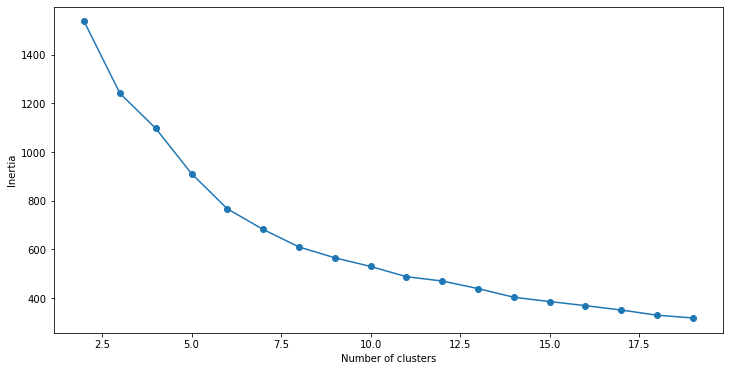

In [22]:
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

The result of kmeans calculation using cluster number 2 to 20, being saved as a dataframe in object called frame. It is boserved that, the decrement of inertia becoming steady from 7 onwards. Thus, by using elbow method rule of thumb, the onset of the steady decrement is selected for the optimum cluster number.

In [23]:
!pip install --upgrade kneed

In [24]:
from kneed import KneeLocator
elbow = KneeLocator(range(2, 20), SSE, curve="convex", direction="decreasing")

In [25]:
elbow.elbow

8

In order to firm up the selection, KneeLocator function from kneed is used. Here, same range of cluster number were tested, where the number of optimum cluster is calculated as 7.

In [26]:
# k means using 8 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 7, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [27]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

5    95
0    36
4    28
1    26
6    20
2     7
3     2
Name: cluster, dtype: int64

Based on the elbow method test, 7 clusters specified in the kmeans modelling. Using the trained model, the quantity of datapoints in each cluster calculated. It is discovered that 95 out of 214 formulations belongs in same cluster; 0. The least is cluter 5 where only 2 formulations. Thus, it can be predicted that 44% of the formulations will yield the same result.